$s$

In [22]:
import ipywidgets as widgets
out = widgets.Output()
with out:
    
    %bookmark 'model_dir'
    current_dir = %pwd
    while 'models' in current_dir:
        %cd ..
        current_dir = %pwd
    %bookmark 'base_dir'
    %cd source_code
    out.clear_output()
%run base
%run gui_v4_vehicles
with out:
    %cd ..
    %cd models/st100_v1/front_suspension
    out.clear_output()

In [23]:
m=model()
m.show()

In [7]:
m.bodies['rbs_chassis'].typ

'mount'

In [8]:
m.joints

jcl_hub_bearing          <constraints.revolute object at 0x000002355C8B...
jcl_lca_ch               <constraints.revolute object at 0x000002355C8B...
jcl_lca_upright          <constraints.spherical object at 0x000002355C8...
jcl_strut_chassis_uni    <constraints.universal object at 0x000002355C8...
jcl_strut_cyl            <constraints.cylindrical object at 0x000002355...
jcl_strut_lca_uni        <constraints.universal object at 0x000002355C8...
jcl_tie_chassis          <constraints.universal object at 0x000002355C8...
jcl_tie_upright          <constraints.spherical object at 0x000002355C8...
jcl_uca_ch               <constraints.revolute object at 0x000002355C8C...
jcl_uca_upright          <constraints.spherical object at 0x000002355C8...
jcr_hub_bearing          <constraints.revolute object at 0x000002355C8C...
jcr_lca_ch               <constraints.revolute object at 0x000002355C8C...
jcr_lca_upright          <constraints.spherical object at 0x000002355C8...
jcr_strut_chassis_uni    

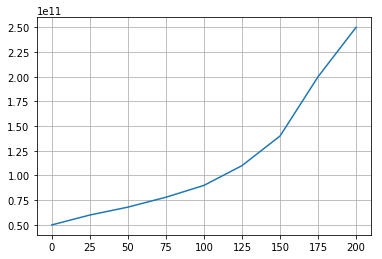

In [10]:
m.forces['fel_air_struts'].spring_curve()

In [11]:
m.vectors

ovl_lateral_vector       ([0.0], [-1.0], [0.0])
ovl_lca_rev            ([-680.0], [0.0], [0.0])
ovl_uca_rev             ([260.0], [0.0], [0.0])
ovr_lateral_vector        ([0.0], [1.0], [0.0])
ovr_lca_rev           ([-680.0], [-0.0], [0.0])
ovr_uca_rev            ([260.0], [-0.0], [0.0])
dtype: object

In [12]:
p1 = m.points['hpl_ucao']
p2 = m.points['hpl_lcao']
pl = point.mid_point(p1,p2,'hpl_upright_mid')
pl

point object at [   0.  -826.5  659. ]

In [29]:
wheel_drive     = rotational_drive(wheel_hub)
vertical_travel = absolute_locating(wheel,'z')

NameError: name 'wheel_hub' is not defined

In [17]:
widgets.ToggleButton(icon='cube')

ToggleButton(value=False, icon='cube')